pip install UpSetPlot


In [1]:
lstlex = "ducange glaff LGERM morphalou tlfi".split()


In [3]:
import json
from pathlib import Path
folder = Path("lexiques")

dico_lex = {}
for lex in lstlex:
    dico_lex[lex] = {}
    for f in folder.glob(f"{lex}*.json"):
        dico_lex[lex] = set(json.load(f.open()))

dico_lex


{'ducange': {'per clocas ecclesiæ',
  'auriculam debere',
  'ballatorium',
  'alphium',
  'capiger',
  'cespitarii',
  'ruteling',
  'armum',
  'forstarius',
  'epithymum',
  'jurare cum triginta consacramentalibus',
  'ensucare',
  'catela',
  'bugeri',
  'clausellus',
  'foacis',
  'ledighman',
  'buista',
  'voisdius',
  'curriculus',
  'saltatio',
  'ranaterius',
  'chelindrus',
  'adxivellari',
  'hexamitum',
  'corium',
  'hostitium',
  'prosaticus',
  'tritheitæ',
  'hida',
  'faldistorium',
  'summonere',
  'cripido',
  'parlamentum nigrum',
  'ultella',
  'maurisalus',
  'carecta',
  'sigillum raphaelis',
  'parergium',
  'cantinella',
  'affica',
  'epyphium',
  'hospitaria',
  'abatta',
  'incoctus',
  'giorsum',
  'opiare',
  'lambare',
  'munuscularius',
  'guattarus',
  'seyterium',
  'gangalizare',
  'excusator',
  'rogia',
  'chalungium',
  'acetaculum',
  'debitalis',
  'notarii sacri palatii',
  'proseucare',
  'soigneia',
  'idoneum se reddere',
  'subtegmen',
  'gan

In [7]:
from upsetplot import from_contents

test = from_contents(dico_lex)
test


id
ducange glaff LGERM morphalou tlfi                      
True    False False False     False  per clocas ecclesiæ
                              False     auriculam debere
                              False          ballatorium
                              False              alphium
                              False              capiger
...                                                  ...
False   False False False     True                engieu
                              True                 sword
                              True              piteable
                              True              febronne
                              True              redoleat

[3851515 rows x 1 columns]

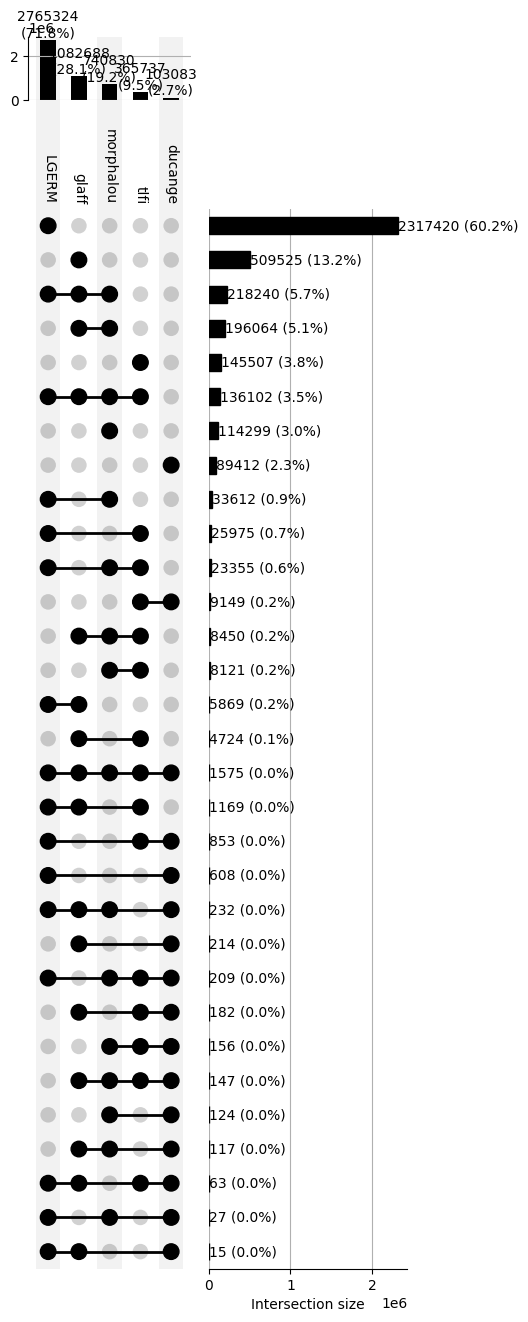

In [15]:
from upsetplot import UpSet
ax_dict = UpSet(
    test,
    orientation='vertical',
    sort_by='cardinality',
    subset_size='count',
    show_counts=True,
    show_percentages=True
).plot()
